# Selenium
- web browser를 새로 띄워서 원격 조종한다.
- browser를 쓰기 때문에 header 정보를 줄 필요가 없다. (편리)
- browser를 쓰기 때문에 해석된 결과물을 볼 수 있다. (편리)
    - DHTML 이라 할지라도, 렌더링된 HTML을 받아서 DOM을 만들 수 있다.
- Selenium으로 scraping하면 잘 못 사용하고 있는 것이다.
    - cookies나 session을 이용하기 위해서 사용하는 것이 좋다.
    - Selenium은 DHTML같이 해석하기 어려운 웹사이트를 scrap하기 위해서 사용하는 것이 좋다.

### 사전 준비
- https://chromedriver.chromium.org/downloads
- 자기가 사용 중인 Chrome의 버전과, 운영체제에 맞게 chromedriver를 다운로드 받는다.
- chrome버전 확인은 "Chrome 맞춤설정 및 제어"(세로로 점 세개 아이콘) => 도움말 => Chrome 정보 에서 확인할 수 있다.
- 다운로드한 파일은 압축을 풀어서 현재 작업 중인 파일과 같은 폴더에 넣어준다.

In [3]:
!pip install selenium

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
from selenium import webdriver

# chromedriver.exe 파일의 경로를 인자로 전달한다.
# 현재 작업중인 파일과 같은 폴더에 있으면 인자를 안 줘도 된다.

# 실행하면 새로운 크롬 창이 뜬다.
driver = webdriver.Chrome()

In [37]:
# 원하는 사이트로 이동

driver.get("http://example.webscraping.com/places/default/search")

> browser 자체가 가지고 있는 dom을 이용해서 select할 수 있다.
>
> BeutifurlSoup과 비슷하다.

In [38]:
# 검색창을 선택해보자.

searchTerm = driver.find_element_by_id("search_term")

In [39]:
# 현재는 아무 글자가 없으므로 비어있다... => ? 

searchTerm.text

''

In [40]:
# 검색어를 입력해보자.
# 실행 후 원격 브라우저를 확인해보면 korea가 검색창에 입력되어 있다.

searchTerm.send_keys("korea")

In [41]:
# 검색 버튼을 찾아보자

submitBtn = driver.find_element_by_css_selector("input[type=submit]")

In [42]:
# click 메서드로 클릭할 수 있다.

submitBtn.click()

In [43]:
# 

resultDiv = driver.find_element_by_xpath("//div[@id='results']")
resultDiv.text

'North Korea\nSouth Korea'

In [44]:
t = resultDiv.find_element_by_xpath(".//a")

In [ ]:
# web browser로 이미 렌더링했기 때문에 full url이 나온다.
# urljoin을 따로 할 필요가 없음.

for _ in resultDiv.find_elements_by_xpath(".//img"):
    print(_.get_attribute("src"))

----

In [25]:
import requests
from bs4 import BeautifulSoup

In [24]:
dom = BeautifulSoup(driver.page_source, "lxml")

In [26]:
for _ in dom.select_one("#results").select("img"):
    print(requests.compat.urljoin(driver.current_url, _["src"]))

http://example.webscraping.com/places/static/images/flags/kp.png
http://example.webscraping.com/places/static/images/flags/kr.png


In [27]:
for _ in dom.select_one("#results").select("a"):
    print(requests.compat.urljoin(driver.current_url, _["href"]))

http://example.webscraping.com/places/default/view/North-Korea-165
http://example.webscraping.com/places/default/view/South-Korea-211


Driver -> URL -> Response(HTML) -> 검색 -> AJAX -> Response(Data) -> 
(\*) Rendering -> Browsing -> find_함수(URL join)

---

> web driver를 종료할때는 직접 창을 닫지 말고 반드시 driver.close()를 이용하세요!

In [29]:
# 현재 켜져있는 web driver의 목록

driver.window_handles

['CDwindow-369887B2E182EE5288A77688565541E6']

In [35]:
# 현재 작업중인 web driver를 종료

driver.close()

In [31]:
# 현재 켜져있는 web driver가 없으므로 에러를 발생시킴

driver.window_handles

InvalidSessionIdException: Message: invalid session id


---

# 네이버 실습

### 로그인 정보 

In [49]:
import json

In [71]:
with open("naver_id.json", "r", encoding="utf-8") as fp:
    account = fp.read()

In [72]:
account = json.loads(account)

---

### webdriver 이용

In [73]:
driver = webdriver.Chrome()
driver.get("https://www.naver.com")

> 바로 네이버 메일의 url을 가도 된다.
>
> 그러나, 일부 웹사이트에서는 사람이 하듯이 정상적인 절차로 접속하지 않으면, bot으로 인식하고 차단하는 경우가 있다.
>
> 마치 사람인양, main 사이트부터 접속해서 메일함으로 접속하면 문제없다.
>
> 어떤 사이트로부터 접속했는지는 headers의 referer를 통해서 확인할 수 있다.

In [74]:
# 네이버 메일로 가기 버튼 클릭

driver.find_element_by_css_selector(".an_a.mn_mail").click()

In [75]:
# id 입력

driver.find_element_by_name("id").send_keys(naver_id["id"])

In [77]:
# pw 입력

driver.find_element_by_xpath("//input[@id='pw']").send_keys(naver_id["pw"])

In [78]:
# 입력 버튼 클릭

driver.find_element_by_css_selector("input.btn_global[type=submit]").click()

> capcha는 어떻게 할 수 없다.
>
> capcha가 뜨면 수동으로 로그인하자.

In [82]:
# 스팸 메일함으로 이동
# +는 형제 노드이다.
 
driver.find_element_by_css_selector("span.item_wrap.bu6 > i.ico_mbox + a").click()

In [84]:
# 스팸메일함의 메일 목록을 읽어보자

for _ in driver.find_elements_by_css_selector("div.subject"):
    print(_.text)

스팸자동이동
(광고) 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~
시스템차단
해외정품 비/아/그/라 종합 남성 사이트 클릭 <<
시스템차단
2019 이벤트 정품 비/아/그/라 할인행사중
시스템차단
2019 이벤트 정품 비/아/그/라 할인행사중
스팸자동이동
ONLY 4 HOURS LEFT: Do this before bed … or miss out forever
스팸자동이동
EXPIRES AT 12 MIDNIGHT: Your LAST shot at getting “5G Rich”
시스템차단
정품 비/아/그/라 구입 이제 집에서 클릭 한번으로 쉽게
스팸자동이동
Named inside: Three 5G stocks surging 3x the S&P! NOW!
스팸자동이동
[URGENT] Critical Warning About Tomorrow Night
스팸자동이동
[DBGuide.net] 빅데이터 최고전략가 1기 교육생 모집중!! (접수기간 : 9월 22일까지)
스팸자동이동
(광고) [깜짝선물] 추석명절을 맞아 특별한 선물을 준비했습니다.
시스템차단
해외정품 비/아/그/라 종합 남성 사이트 클릭 <<
시스템차단
프리미엄 온라인 남성 종합 쇼핑몰 정품 비/아/그/라
시스템차단
정품 비/아/그/라 종합 사이트 남자 Click 이벤트중
스팸자동이동
[EXPIRING SOON] Your roadmap to systematic 5G windfalls


In [86]:
# BeautifulSoup으로 dom을 만들어서 찾을 수도 있다.
# webdriver의 select한 객체와, BeautifulSoup의 select한 객체는 서로 type이 달라서 호환되지 않는다.

dom = BeautifulSoup(driver.page_source, "lxml")
for _ in dom.select("div.subject"):
    print(_.text)

스팸자동이동에 분류됨메일 제목:(광고) 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~메일 내용 미리보기 레이어 열림새 창으로 메일 보기
시스템차단에 분류됨메일 제목:해외정품 비/아/그/라 종합 남성 사이트 클릭  <<메일 내용 미리보기 레이어 열림새 창으로 메일 보기
시스템차단에 분류됨메일 제목:2019 이벤트 정품 비/아/그/라 할인행사중메일 내용 미리보기 레이어 열림새 창으로 메일 보기
시스템차단에 분류됨메일 제목:2019 이벤트 정품 비/아/그/라 할인행사중메일 내용 미리보기 레이어 열림새 창으로 메일 보기
스팸자동이동에 분류됨메일 제목:ONLY 4 HOURS LEFT: Do this before bed … or miss out forever메일 내용 미리보기 레이어 열림새 창으로 메일 보기
스팸자동이동에 분류됨메일 제목:EXPIRES AT 12 MIDNIGHT: Your LAST shot at getting “5G Rich”메일 내용 미리보기 레이어 열림새 창으로 메일 보기
시스템차단에 분류됨메일 제목:정품 비/아/그/라 구입 이제 집에서 클릭 한번으로 쉽게메일 내용 미리보기 레이어 열림새 창으로 메일 보기
스팸자동이동에 분류됨메일 제목:Named inside: Three 5G stocks surging 3x the S&P! NOW!메일 내용 미리보기 레이어 열림새 창으로 메일 보기
스팸자동이동에 분류됨메일 제목:[URGENT] Critical Warning About Tomorrow Night메일 내용 미리보기 레이어 열림새 창으로 메일 보기
스팸자동이동에 분류됨메일 제목:[DBGuide.net] 빅데이터 최고전략가 1기 교육생 모집중!! (접수기간 : 9월 22일까지)메일 내용 미리보기 레이어 열림새 창으로 메일 보기
스팸자동이동에 분류됨메일 제목:(광고) [깜짝선물] 추석명절을 맞아 특별한 선물을 준비했습니다.메일 내용 미리보기 레이어 열림새 창으로 메일 보기
시스템차단에 분류됨메일 제목:해외정품 비/아/그/라 종합 

---

# 로그인 cookie를 얻어서 session에 입력하기

> 로그인하기 전에 개발자 도구에서 cookies를 확인해보면 값이 몇개 없다.

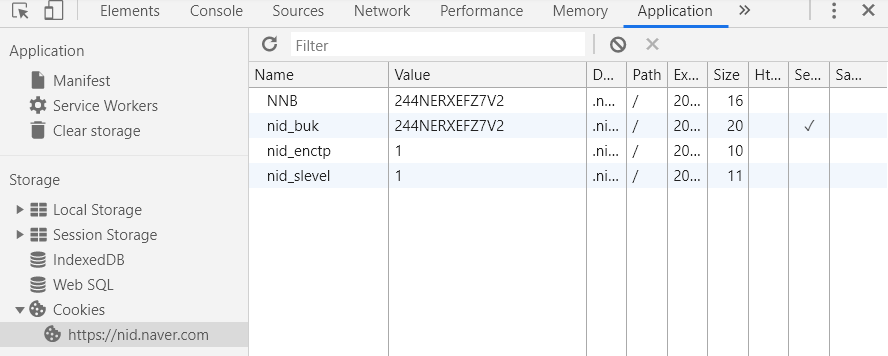

> 로그인 후에 cookies를 확인해보면 값이 많이 늘었다. 
>
> 로그인 정보를 cookies로 가지고 있는 상태이다.

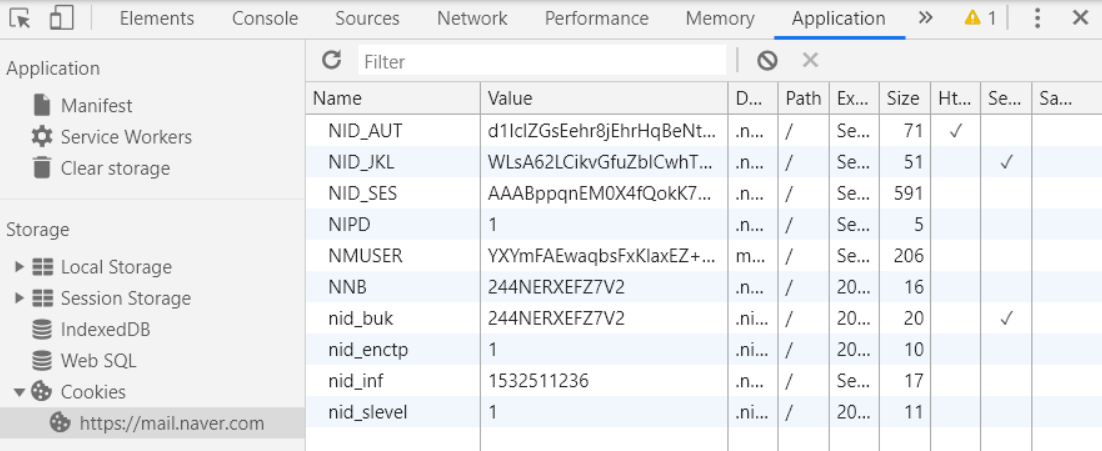

In [87]:
# 현재 driver가 가지고 있는 쿠키 정보를 보자

for _ in driver.get_cookies():
    print(_["name"])
    print(_["value"])

NIPD
1
NNB
244NERXEFZ7V2
NID_JKL
WLsA62LCikvGfuZbICwhTFuHcZgCvUdKKz2WMtueTog=
nid_inf
1532511236
NMUSER
YXYmFAEwaqbsFxKlaxEZ+rwqpXvlKqnwFxM/FouXaAUZaqEwKogsKAnsadEsFAK9FqUXaw/wFxRpad/syqvs6xRpadUs6xnstonsarRTBdRLa9vstonsH405pzk/7xt5W4d5W4JrpBU5MreR7A2lKAgsbrkoWrlvMBil7605pzk/7xt5W4d5W4JrpBU5MreR7A2lKAgs
NID_SES
AAABpwY98ls6OLaAYcu5ZzHuy7JTe56MqwO/LHvZPGvzTjcRl6lrx8SdyW8XZxVq0mYMxLQ+zoo1vGu93EhwjfZkQvbVRBc+9SQCarKfqxWLQVHhZinsvvUNNq1OgrqFYqxFeVgUpNUvLav9o67kAEuk0wh8j3KDlaKY/xmNHrT/Eo9NLj55J7RnEaSkmBtu6mS3qBpTsHngjanbvjrDeTu2GwvAoCTcAShmAkzhgczXjCzJT40TZjFCTykaYjo5Bs48N8Debz5rZSC/Z7dEaCBmW6GlBCZQf+ylAlA2ts5/M3VuQNLtjE3BYGtfq6xyRculMxVgsm5mf9yBcflICD3slWObjMZP9sWrHov4VyijvqVYnheAzzXH3RtnY7abaTw9jHA57BHXTaYQ04ldljtf4xRRv+l3fAdawo0zDNEyL7VZq3LKVgqMcomC8l39koF8dh0tux40nuYuK9dgqo2YGhCGWe8uLWd8gmEKBx5JRgeMNUPMhMjm9Rh63HOh4PnAC5yQIHQ7mnBWlCXUHP+IMN7j6/MBwjSzVTe2iWbL7NK6wvPgoiAV4QwdJ/6snpuvdQ==
NID_AUT
d1IcIZGsEehr8jEhrHqBeNt5oXeTxLzbicsThQapQy7HWj/HDpVZhjIrEU6Tvb/B


In [89]:
# session 객체에 쿠키를 저장하자.

session = requests.Session()
for _ in driver.get_cookies():
    session.cookies.set(_["name"], _["value"])

In [90]:
# session에 쿠키값이 저장되었다.

session.cookies

<RequestsCookieJar[Cookie(version=0, name='NID_AUT', value='d1IcIZGsEehr8jEhrHqBeNt5oXeTxLzbicsThQapQy7HWj/HDpVZhjIrEU6Tvb/B', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='NID_JKL', value='WLsA62LCikvGfuZbICwhTFuHcZgCvUdKKz2WMtueTog=', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='NID_SES', value='AAABpi03Z032AcMwfgiNV9l6k2Drhz69gezTNIJmR7JpAMcqz/rqnCQB/7aQxjPoT/Zt5dle3XBiepMKBzsh6ruCLFo9jSTOO23Sc/x+yAuIW9quOEnerUwbVWgiwoNfNC/DwDaEbpXvnHxTt/9WWRsuz9JXzG5a8CeVBrkvGhYbk0fjUfJJckZYaIl7cwjb/iRMp/pctCpTRXQP454fMTXeeyh8V0bJaePovfvO+OwOVcpV0OD7HDkJqpYZ5vSuwgANGv8J

In [96]:
# spam 메일함에 접근하기.
# cookie 값이 없이, 네이버 메일에 접근하면 로그인이 안되어있다는 메시지가 뜬다.

url = "https://mail.naver.com/json/list/?page=1&sortField=1&sortType=0&folderSN=5&type=&isUnread=false&u=wlsgy93"
resp= requests.get(url)
resp.text

'{"Result":"FAIL","Message":"", "LoginStatus":"NOLOGIN"}'

In [97]:
# session이 cookie 값을 물고 있다.
# 하지만 get 방식을 썼기 때문에 제대로 응답이 오지 않았다.
# post 방식을 써야한다.

resp = session.get(url)
resp.text

''

In [98]:
resp = session.post(url)
resp.json()

{'currentTime': 1568618335,
 'lastPage': 2,
 'Message': '',
 'pageSize': 15,
 'unreadCount': 16,
 'mailData': [{'mailSN': 74981,
   'folderSN': 5,
   'folderName': None,
   'iconType': 0,
   'status': 2097152,
   'from': {'name': '롯데 신차 장기 렌터카', 'email': 'a-tools01@ebiznetworks.kr'},
   'subject': '(광고) 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~',
   'receivedTime': 1568611819,
   'sentTime': 1568609780,
   'size': 6610,
   'attachCount': 0,
   'iDomainEmail': 'wlsgy93@naver.com',
   'priority': 3,
   'securityLevel': None,
   'reSend': False,
   'color': '#ffffff',
   'preview': '',
   'mimeSN': '1568611819.832549.63963.18176',
   'toList': [{'name': '', 'email': 'wlsgy93@naver.com'}],
   'spamType': 'AUTO_MOVE',
   'attachInfo': [],
   'threadId': '<210425335.48134.1568611819810@[218.145.69.125]>',
   'bccList': [],
   'receiveByBcc': False,
   'threadCount': 0,
   'unreadThreadCount': 0,
   'firstLocatedTime': 1568611819,
   'remindAt': 0,
   'threadRemindAt': 0,
   'threadRemindFla

In [99]:
len(resp.json()["mailData"])

15

In [100]:
# 스팸 메일의 제목을 뽑아보자.

for _ in resp.json()["mailData"]:
    print(_["subject"])

(광고) 차 바꾸고 싶을때!!! 보증금 ZERO 신차 장기렌트가 무료견적 받아보세요~
해외정품 비/아/그/라 종합 남성 사이트 클릭  &lt;&lt;
2019 이벤트 정품 비/아/그/라 할인행사중
2019 이벤트 정품 비/아/그/라 할인행사중
ONLY 4 HOURS LEFT: Do this before bed … or miss out forever
EXPIRES AT 12 MIDNIGHT: Your LAST shot at getting “5G Rich”
정품 비/아/그/라 구입 이제 집에서 클릭 한번으로 쉽게
Named inside: Three 5G stocks surging 3x the S&amp;P! NOW!
[URGENT] Critical Warning About Tomorrow Night
[DBGuide.net] 빅데이터 최고전략가 1기 교육생 모집중!! (접수기간 : 9월 22일까지)
(광고) [깜짝선물] 추석명절을 맞아 특별한 선물을 준비했습니다.
해외정품 비/아/그/라 종합 남성 사이트 클릭  &lt;&lt;
프리미엄 온라인 남성 종합 쇼핑몰 정품 비/아/그/라
정품 비/아/그/라 종합 사이트 남자 Click 이벤트중
[EXPIRING SOON] Your roadmap to systematic 5G windfalls


In [101]:
driver.close()

---

# kt에서 실습

In [102]:
driver = webdriver.Chrome()

In [103]:
driver.get("http://www.kt.com")

In [107]:
# 로그인 버튼 찾기
# 특정할만한 attribute가 없으므로 구조를 이용해서 찾아야한다.

for _ in driver.find_elements_by_css_selector(
    "span.quick a"):
    print(_.text)

로그인
회원가입
간편조회
간편가입
요금조회
소액결제
요금제변경
해외로밍


In [106]:
# :first-child는 첫번째 자식을 고르라는 뜻이다. 

for _ in driver.find_elements_by_css_selector(
    "span.quick:first-child a:first-child"):
    print(_.text)

로그인


In [109]:
# 로그인 창이 새로 뜰 것이다.

driver.find_elements_by_css_selector(
    "span.quick:first-child a:first-child")[0].click()

In [110]:
# 로그인창이 새로 떳기 때문에 window_handles가 2개로 늘었났다.
# 새로 뜨는 창은 리스트 뒤에 계속 붙는다.

driver.window_handles

['CDwindow-00C3E75A73D70F3FB269D56EBBEA9A10',
 'CDwindow-CE4FADA9DDEF7E0381F49C7A910DED6E']

In [111]:
# 새로 뜬 로그인창으로 이동하기

driver.switch_to_window(driver.window_handles[-1])

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: use driver.switch_to.window instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
# 연습용으로 아이디 입력

driver.find_element_by_css_selector("#userId").send_keys("test")

In [114]:
# 연습용으로 password 입력까지만.

driver.find_element_by_css_selector("#password1").send_keys("test")

In [115]:
# 창 닫기

driver.close()

In [116]:
# 원래 브라우저로 돌아가기

driver.switch_to_window(driver.window_handles[0])

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: use driver.switch_to.window instead
  This is separate from the ipykernel package so we can avoid doing imports until


# 네이버 웹툰에서 실습

In [117]:
driver.get("https://comic.naver.com")

In [120]:
driver.find_elements_by_css_selector(".webtoon_area  > .bigimg > a")[0].click()

In [123]:
for _ in driver.find_elements_by_css_selector(".wt_viewer > img"):
    print(_.get_attribute("src"))

https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_1.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_2.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_3.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_4.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_5.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_6.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_7.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_8.jpg
https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG0

https://image-comic.pstatic.net/webtoon/183559/447/20190822100037_686d5ca293677b4420a129345a7914e3_IMAG01_76.jpg


In [129]:
len([_ for _ in driver.find_elements_by_css_selector(".wt_viewer > img")])

76

In [126]:
import os
os.mkdir("webtoon_crawling")

In [128]:
for _ in driver.find_elements_by_css_selector(".wt_viewer > img"):
#     print(_.get_attribute("src"))
    resp = requests.get(_.get_attribute("src"))
    with open("webtoon_crawling/" + resp.url.split("/")[-1], "wb") as fp:
        fp.write(resp.content)

In [131]:
# 댓글은 iframe으로 감싸져있다.
# iframe으로 들어가기.

iframe = driver.find_element_by_css_selector("#commentIframe")
driver.switch_to_frame(iframe)

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.frame instead
  """Entry point for launching an IPython kernel.


In [137]:
driver.find_element_by_css_selector("#cbox_module")

<selenium.webdriver.remote.webelement.WebElement (session="f278cc982fe5a72883cf32e8e33c346c", element="20cc5089-9b77-4ae7-9e52-d668cc37e4ad")>

In [135]:
# 댓글 가져오기

for _ in driver.find_elements_by_css_selector(".u_cbox_contents"):
    print(_.text)

알리스타 바루스 봇듀 갑니다
화이트코인 하락할 기미가 보이지 않는다;;
라크 아무생각 없이 저 창 던져서 도와줄 거 같은데 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
원로는 우렉 몇 손가락일까
아무리봐도 에반켈 코끼리의 힘이 더 쎄보인다..
술취해서 개되는것도 전신의태인가요?
다음화에 전신의태하면 진짜 야마 진짜 개 되나요?
마지막 빅브리더 닮았네
마도라코 랭커들 꽤 오랜 엑스트라였는데 결국 화이트식사였네
현재까지의 밤에게 우호적인 하이랭커급인맥총정리우렉마지노(월하익송 부단장,랭킹4위)백련(월하익송 단장,랭킹9위)하진성(고대의괴물,퍼그원로,밤의 1번째스승)카라카(퍼그슬레이어,자하드의왕자)유리자하드(자하드의공주,하가문직계)포비더구스트앙(10가주,랭킹14위,엄빠친구)아를렌그레이스(엄마,불로불사니 어딘가에 생존중)에반에드록(자하드가 수속길잡이)유한성(2층 총시험감독관)베이로드야마(퍼그 제8번째권좌의 슬레이어)에반켈(전 2층 지배자,랭킹60위,밤의 제2번째스승)화이트(퍼그 10번째 권좌의 슬레이어,아리에가문직계)미르치아루슬렉(탑의실질적인악,퍼그 제1슬레이어,랭킹15위)대충꼽았는데 이정도... 탑최고인맥
에반켈 스승맞춤형 캐릭터네요오브 - 밤 고대종 - 라크연가문불꽃 - 쿤
역시 들소네요 고대종은 인도&힌두교 신화를 따온것
이번화에서 크게 주목해야될 것은 2가지임.1. 밤이 내려가면서 얼굴에 무늬가 더 넓게 나타남.아마 베이로드의 첫째형에게 가까워져서인데, 정신적으로 연결되어 심장에 걸린 주술을 해제하게 되지 않을까 싶음.2. 라크가 루엔이라는 창을 사용할 것도 있지만고대종의 힘을 지닌 사람이 2명이나 있기에라크가 네이티브 원의 후손으로서 어떤 각성을 하게 될 계기가 있음.한 예로 전에 에반켈이 불을 사용하는 모습을 보고 라크가 반응했던 것이 있음.
여태껏 나온 퍼그 길잡이들은 다 붉은 마녀네
난 진짜 살면서 이렇게 모든 캐릭터의 개성이 살아있는 만화는 처음봤다. 사실상 연재하는 만화중 가장 꼭대기에 있다고해도 무방한 원피스조차 여캐들이 다들 너무 비슷하게 생겼다는 말이 많은데 신의 탑은 진

In [140]:
# iframe에서 나오기

driver.switch_to_default_content()

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: use driver.switch_to.default_content instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
driver.current_url

'https://comic.naver.com/webtoon/detail.nhn?titleId=183559&no=447&amp;weekday=mon'

# 무얼 하고 있었더라...

In [143]:
url = driver.find_element_by_css_selector("#commentIframe").get_attribute("src")
resp = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.75 Safari/537.36"})

In [146]:
dom = BeautifulSoup(resp.text, "lxml")

# 최종 과제

Selenium
- 쿠팡 로그인
- 쿠키

Session
- 쿠키 전달
- 마이페이지 주문목록 가져오기

#### 쿠팡 로그인

In [149]:
driver.get("https://www.coupang.com/")

In [151]:
with open("coopang_id.json", "r", encoding="utf-8") as fp:
    account = fp.read()

In [153]:
account = json.loads(account)

In [158]:
driver.find_element_by_css_selector(".my-coupang.more").click()

In [159]:
driver.find_element_by_id("login-email-input").send_keys(account["id"])

In [160]:
driver.find_element_by_id("login-password-input").send_keys(account["pw"])

In [162]:
driver.find_element_by_css_selector("button[type=submit]").click()

#### 쿠키

In [169]:
driver.get_cookies()

[{'domain': '.coupang.com',
  'expiry': 1568708162,
  'httpOnly': False,
  'name': 'baby-isWide',
  'path': '/',
  'secure': False,
  'value': 'small'},
 {'domain': '.coupang.com',
  'httpOnly': False,
  'name': 'CPUSR_RL',
  'path': '/',
  'secure': False,
  'value': 'eDFBp3pmeV8eN36q1CdZKeTt2A%2FtyFA3T6acFwc2Hvqk%2BFbqX%2BxBtaCoVYQSX8tYxsmYugN6JQlCSQSEuEW%2FiqAcuYXla8e19EfdaSj5kogxs0HaL8wXHLAeJp6%2Be3TQKokSlGzAeYul1CkrtPMOXnaOchoP9cQHYRrhXi9XV5VABC8RqTMW7ECzbpuELov5AUPwN9TupqxHGdmuTMxw5HTiIfGt8N7%2F1ZTTElY6WmUGnm8CTiUFOSNf5zpu7XJQSMRBRSboyASnUxQYhjQzwt%2BppHKRISkRauEUUsBYmhAkee1xUPIArj8N6eLUwj8XBC4zox6e6TSXAIX8DV%2BT7p2dKPaR%2FIhV%2BEYEhgJ4Q3E%3D'},
 {'domain': '.coupang.com',
  'expiry': 1576397762,
  'httpOnly': False,
  'name': '_fbp',
  'path': '/',
  'secure': False,
  'value': 'fb.1.1568621475835.1369191519'},
 {'domain': '.coupang.com',
  'httpOnly': True,
  'name': 'CUPT',
  'path': '/',
  'secure': False,
  'value': '-XOA-D4gG_PdKy6Q8r8-HFzczwPitRGlwoIqqGyhHhdgOM-GXXiBWZEjGl

#### 쿠키 전달

In [167]:
session = requests.Session()

In [168]:
for _ in driver.get_cookies():
#     print(_["name"])
#     print(_["value"])
    session.cookies.set(_["name"], _["value"])

#### 마이페이지 주문목록 가져오기

In [176]:
resp = session.get(driver.current_url)

In [177]:
dom = BeautifulSoup(resp.text, "lxml")

In [178]:
dom.select("#listContainer > div")[0].text.strip()

'주문일 2019/3/4\n\n\n\n주문상세보기 \n\n\n\n\n\n\n\n\n\n\n\n레이어 닫기\n\n\n\n\n\n          판매자 정보\n        \n\n\n판매자명\n뮤마스\n\n\n연락처\n053-217-7579\n\n\n\n\n            판매자 뮤마스님에 문의하실 것이 있으세요?\n          \n\n\n\n\n              주민번호, 전화번호, 이메일 등 개인정보를 남기면 타인에 의해 도용될 수 있습니다.\n              개인정보는 상품문의에 남기지 마세요.\n            \n\n\n              문의하신 내역은\n              마이쿠팡 >\n                고객센터 > 문의내역에서\n              확인하실 수 있습니다.\n            \n\n\n\n              판매자에게 1:1 문의하기\n            \n\n\n\n\n\n\n\n주문 박스 단위\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  바로와 코시나 규조토 욕실매트 + 미끄럼 방지패드\n                        바로와 코시나 규조토 욕실매트 + 미끄럼 방지패드, 그레이, L(60 x 39 cm)\n                      \n\n\n                    \n                      11,100원 /\n                    \n\n                    \n                      \n                      \n                        \n                          1개\n                        \n                      \n                    \n\n                   

In [184]:
dom.select(".my-order-unit__info-name.my-font--13")[0].text.strip()

'바로와 코시나 규조토 욕실매트 + 미끄럼 방지패드\n                        바로와 코시나 규조토 욕실매트 + 미끄럼 방지패드, 그레이, L(60 x 39 cm)'

In [185]:
driver.current_url

'https://my.coupang.com/purchase/list'

In [192]:
driver.switch_to_window(driver.window_handles[0])
driver.close()

C:\Users\JINHYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use driver.switch_to.window instead
  """Entry point for launching an IPython kernel.
